In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\TANISH\OneDrive\Desktop\Machine Learning\PROJECT\Insurance LiR (P)\ML Project - Linear Regression Insurance Prediction 16955515670.csv")

In [75]:
data

,age,sex,bmi,children,smoker,region,charges,linear_Predict_charges,dt_predict_charges
0,19,2,27.900,0,1,3,16884.92400,25111.241864,16884.92400
1,18,1,33.770,1,0,2,1725.55230,3687.605173,1725.55230
2,28,1,33.000,3,0,2,4449.46200,6963.145707,4449.46200
3,33,1,22.705,0,0,1,21984.47061,3741.308405,21984.47061
4,32,1,28.880,0,0,1,3866.85520,5537.640897,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,12302.006002,10600.54830
1334,18,2,31.920,0,0,0,2205.98080,3431.371647,2205.98080
1335,18,2,36.850,0,0,2,1629.83350,4363.662366,1629.83350
1336,21,2,25.800,0,0,3,2007.94500,1106.986613,2007.94500


In [4]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

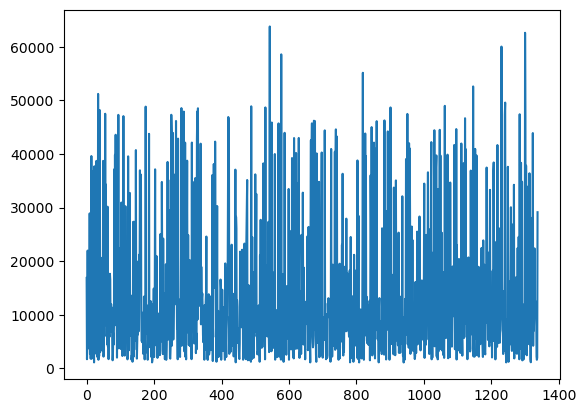

In [5]:
plt.plot(data['charges'])

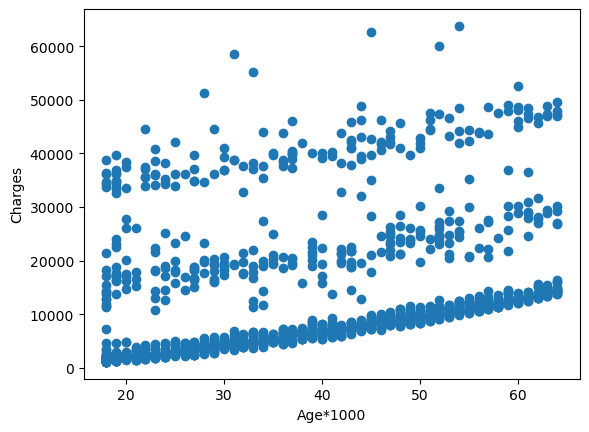

In [6]:
plt.scatter(data['age']*1000,data['charges'])
plt.xlabel('Age*1000')
plt.ylabel('Charges')
plt.gca().set_xticklabels([int(x/1000) for x in plt.gca().get_xticks()])
plt.show()

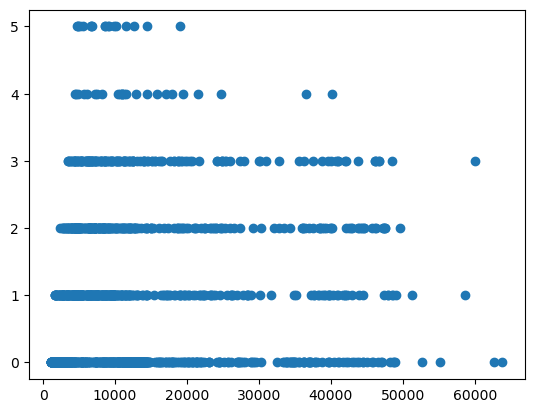

In [7]:
plt.scatter(data['charges'],data['children'])

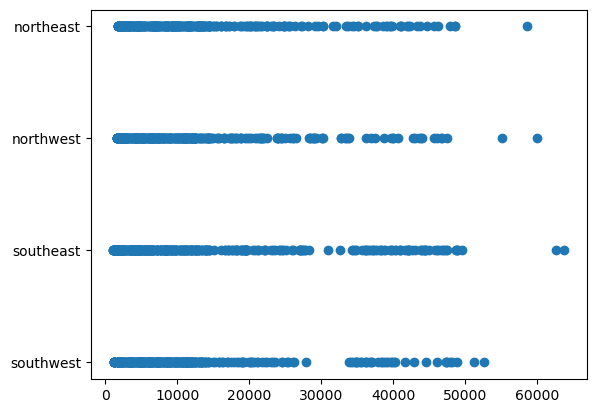

In [8]:
plt.scatter(data['charges'],data['region'])

### Encoding

In [9]:
data['sex'].replace(['male','female'],[1,2],inplace=True)

In [10]:
data['sex'].unique()

array([2, 1], dtype=int64)

In [11]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
data['smoker'].replace(['yes','no'],[1,0],inplace=True)

In [13]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,2,31.920,0,0,northeast,2205.98080
1335,18,2,36.850,0,0,southeast,1629.83350
1336,21,2,25.800,0,0,southwest,2007.94500


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
enc=LabelEncoder()

In [16]:
data['region']=enc.fit_transform(data['region'])

In [17]:
data['region'].unique()

array([3, 2, 1, 0])

In [18]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,2,31.920,0,0,0,2205.98080
1335,18,2,36.850,0,0,2,1629.83350
1336,21,2,25.800,0,0,3,2007.94500


In [19]:
x=data.drop('charges',axis=1)

In [20]:
y=data['charges']

### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model=LinearRegression()

In [23]:
model.fit(x,y)

LinearRegression()

In [24]:
model.score(x,y)

0.7507372027994939

In [25]:
data['linear_Predict_charges']=model.predict(x)

In [26]:
data

,age,sex,bmi,children,smoker,region,charges,linear_Predict_charges
0,19,2,27.900,0,1,3,16884.92400,25111.241864
1,18,1,33.770,1,0,2,1725.55230,3687.605173
2,28,1,33.000,3,0,2,4449.46200,6963.145707
3,33,1,22.705,0,0,1,21984.47061,3741.308405
4,32,1,28.880,0,0,1,3866.85520,5537.640897
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,12302.006002
1334,18,2,31.920,0,0,0,2205.98080,3431.371647
1335,18,2,36.850,0,0,2,1629.83350,4363.662366
1336,21,2,25.800,0,0,3,2007.94500,1106.986613


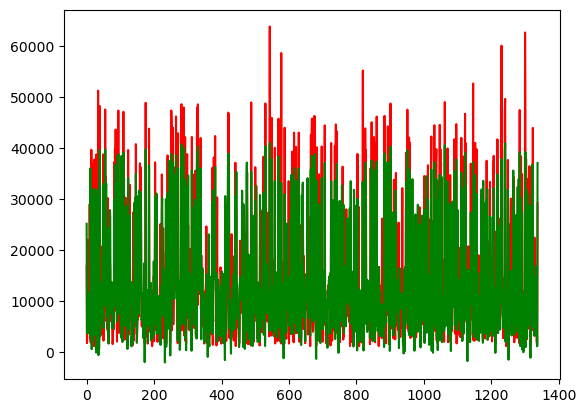

In [27]:
plt.plot(data['charges'],'r')
plt.plot(data['linear_Predict_charges'],'g')
plt.show()

### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=9)

In [30]:
model.fit(x_train,y_train)

LinearRegression()

In [31]:
model.score(x_train,y_train)

0.7440253259062534

In [32]:
model.score(x_test,y_test)

0.7778683760574732

In [33]:
from sklearn.linear_model import Lasso,Ridge

In [34]:
model1=Lasso(100)

In [35]:
model1.fit(x_train,y_train)

Lasso(alpha=100)

In [36]:
model1.score(x_train,y_train)

0.7435073518381559

In [37]:
model2=Ridge(1.5)

In [38]:
model2.fit(x_train,y_train)

Ridge(alpha=1.5)

In [39]:
model2.score(x_train,y_train)

0.7439808824976479

In [41]:
y2=data['linear_Predict_charges']

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [43]:
mean_absolute_error(y,y2)

4172.487114944051

In [44]:
mean_squared_error(y,y2)

36527659.885682374

In [45]:
(mean_squared_error(y,y2))**(1/2)

6043.8117017063305

In [46]:
np.sqrt(mean_squared_error(y,y2))

6043.8117017063305

### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
dt=DecisionTreeRegressor()

In [49]:
dt.fit(x,y)

DecisionTreeRegressor()

In [50]:
dt.score(x,y)

0.998667156135576

In [51]:
dt.score(x_train,y_train)

0.9991739074651196

In [52]:
dt.score(x_test,y_test)

0.996551367790828

In [53]:
data['dt_predict_charges']=dt.predict(x)

### Cross Validation, MAE, MSE, RMSE

In [55]:
from sklearn.model_selection import cross_val_score

In [66]:
cross_val_score(dt,x,y,cv=5).mean()

0.7138614222343864

In [67]:
y3=data['dt_predict_charges']

In [71]:
mean_absolute_error(y,y3)

23.64917144992526

In [72]:
mean_squared_error(y,y3)

195318.62719663917

In [73]:
(mean_squared_error(y,y3))**(1/2)

441.9486703188948